In [1]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import concurrent.futures

In [2]:
# Set working directory
os.chdir(os.path.dirname(os.getcwd()))
project_path = os.getcwd()
print(project_path)

/home/ubuntu/master_thesis


In [3]:
# Load local libraries
from src.Fundus import Fundus
from src.get_info_from_name import get_info_from_name
from src.logger import set_logger as sl

In [4]:
# Load file with metadata
ukbb = pd.read_csv("./data/ukbb_metadata.csv")
ukbb.head()

,file,sex,patient_id,eye_side,visit,replica
0,1000180_21015_0_0.png,female,1000180,left,0,0
1,1000180_21016_0_0.png,female,1000180,right,0,0
2,1000303_21015_1_0.png,female,1000303,left,1,0
3,1000303_21016_1_0.png,female,1000303,right,1,0
4,1000390_21015_1_0.png,male,1000390,left,1,0


## Eye side

In [5]:
ukbb.eye_side.value_counts()

right    88156
left     86830
Name: eye_side, dtype: int64

In [6]:
ukbb.eye_side.value_counts()/ukbb.shape[0]

right    0.503789
left     0.496211
Name: eye_side, dtype: float64

## Female/Male distribution

### CFP

In [7]:
ukbb.sex.value_counts()

female    93753
male      81233
Name: sex, dtype: int64

In [8]:
ukbb.sex.value_counts()/ukbb.shape[0]

female    0.535774
male      0.464226
Name: sex, dtype: float64

### Patients

In [9]:
# Number of unique patients
ukbb.patient_id.unique().shape[0]

85623

In [10]:
# Number of patients per sex
for by, df in ukbb.groupby("sex"):
    print(by, df.patient_id.unique().shape[0], df.patient_id.unique().shape[0]/ukbb.patient_id.unique().shape[0], sep="\t")

female	45948	0.5366315125608774
male	39675	0.4633684874391227


## Images

In [11]:
data_path = os.path.abspath(f"/mnt/ukbb/raw/")

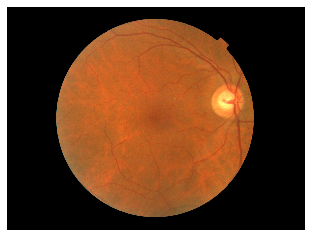

In [12]:
example = os.path.join(data_path, os.listdir(data_path)[2])

# Read image
eye = Fundus(example)

# Show image
eye.show()

In [13]:
# Dimensions 
eye.dim

(1536, 2048)

### Get min, max, mean, median and standar deviation for each RGB channel per image

In [28]:
%%time
if not os.path.isfile(os.path.abspath("./data/ukb_rgb_stats.csv"))
    def parallel_stats(f):
        path = os.path.join(data_path, f)
        eye = Fundus(path)
        return path, eye.get_rgb_stats()

    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(parallel_stats, ukbb.file)

    # Get the results
    results = [[os.path.basename(p)]+list(s) for p, s in results]

    # Save the results
    stats = pd.DataFrame(results, columns=["file", "min_r", "min_g", "min_b", "max_r", "max_g", "max_b", "mea_r", "mea_g", "mea_b", "med_r", "med_g", "med_b", "std_r", "std_g", "std_b" ])
    stats.to_csv("./data/ukbb_rgb_stats.csv", index=False)
else:
    stats = pd.read_csv(os.path.abspaht("./data/ukbb_rgb_stats.csv"))

CPU times: user 11h 49min 59s, sys: 17min 15s, total: 12h 7min 14s
Wall time: 1h 32min 21s
